# Importar librerias

In [ ]:
import numpy as np
import math
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
from sklearn.metrics import confusion_matrix

# DataSet

Download the dataset from [here](https://drive.google.com/drive/folders/1_g7J5U65s2Wyt5fWgUWlpkrtRJmK-Zyg?usp=sharing) or simply create a shortcut in your Google Drive.

----

- The following code demonstrates how to load your Google Drive.
- Rewrite the path in case your dataset is located in a different directory on your google drive or in a local computer.

## Mel-frequency cepstral coefficient
For obtaining the feature vector from the audio file, we will use the mel-frequency cepstral coefficients [(MFCC).](https://speechprocessingbook.aalto.fi/Representations/Melcepstrum.html), and for  obtain this  mel-frequency from an audio, we will use the librosa [library](https://librosa.org/doc/latest/index.html).

## Feature Vector

To obtain the feature vector, we divide the signal into windows. We will have a total of 80 windows, and from each window, we will extract 230 mel coefficients. We then calculate the average of the coefficients from each window, resulting in a 80-dimensional vector for each audio signal. This vector is the characteristic vector that represents an audio signal.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/')
# "Rewrite the path in case your dataset is located in a different directory on your drive.
#path = '/content/drive/MyDrive/Machine Learning/Proyecto 4/files_proy4/'
path = './datasets'

Mounted at /content/drive/


**"If your directory is correct, you should be able to listen to the following audio**

In [ ]:
import librosa
import librosa.display
from IPython.display import Audio

Shape of feature vector:  (60,)
Feacture Vector of the 441 sound : [-6.2979736e+02  2.4638885e+02  1.4905873e+02  3.9602642e+01
 -4.1637466e+01 -7.1249619e+01 -5.3814034e+01 -1.5042660e+01
  1.5241670e+01  2.0506601e+01  3.7178783e+00 -1.8863230e+01
 -3.0682945e+01 -2.5656340e+01 -1.0167918e+01  3.6240020e+00
  7.0008779e+00 -2.7142042e-02 -1.0240271e+01 -1.5549894e+01
 -1.2986045e+01 -5.9717598e+00 -7.3934877e-01 -1.2013893e+00
 -6.2209535e+00 -1.1063605e+01 -1.1502326e+01 -7.1189370e+00
 -1.3711215e+00  1.3700408e+00 -6.6809911e-01 -5.3834858e+00
 -8.6228781e+00 -7.4763021e+00 -2.4795158e+00  2.8813844e+00
  4.8926363e+00  2.3860877e+00 -2.5402572e+00 -6.2338152e+00
 -6.2137418e+00 -2.8450775e+00  1.2005171e+00  3.1094739e+00
  1.9653624e+00 -8.1210101e-01 -2.8066759e+00 -2.5452447e+00
 -4.9179456e-01  1.5565472e+00  2.0266938e+00  7.9586053e-01
 -8.5404050e-01 -1.4246600e+00 -4.7017714e-01  1.0924742e+00
  1.8204807e+00  1.0010624e+00 -7.2573984e-01 -1.8830682e+00]


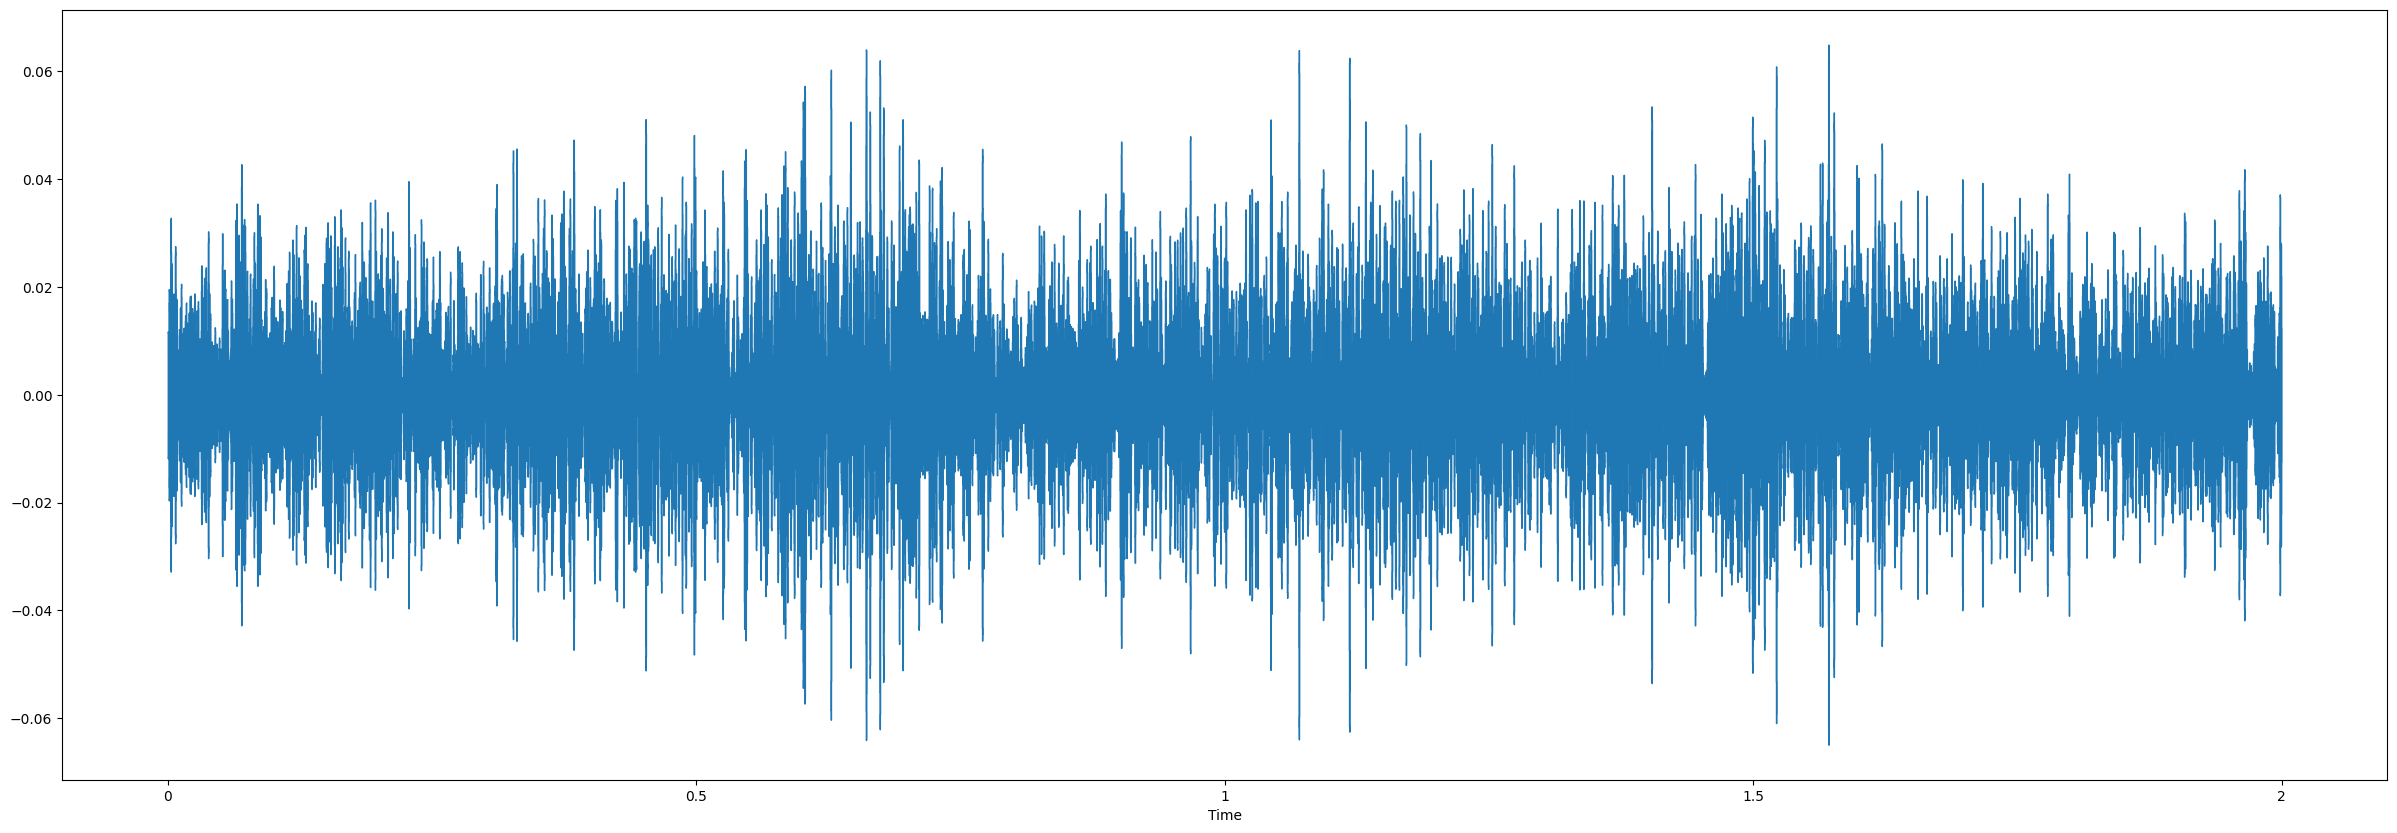

In [ ]:
y, sr = librosa.load(path + "/train/1.wav")
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=60)
feature_vector = np.array(mfccs.mean(axis = 1))
mel_spectrogam = librosa.feature.melspectrogram(y=y, sr=sr)
print("Shape of feature vector: ", feature_vector.shape)
print("Feacture Vector of the 441 sound :" , feature_vector)
plt.figure(figsize=(30,10))
librosa.display.waveshow(y, sr=sr)
Audio(data=y, rate=sr)

## Noise reduction

As indicated in the statement, the sounds are together with anthropogenic sounds, so we aply the [noisereduce](https://github.com/timsainb/noisereduce) library to reduce the noise. The library creates a new wave with reduced noise. How this library was applies is in the reduce_noise.py file. The resulting waves are found the in the directory train_reduced and test_reduced for train and test respectively.

Shape of feature vector:  (60,)
Feacture Vector of the 441 sound : [-7.2853101e+02  2.3846327e+02  1.4388971e+02  3.6523945e+01
 -4.3999969e+01 -7.4064163e+01 -5.7698017e+01 -1.9573721e+01
  1.1311750e+01  1.8183659e+01  3.0401673e+00 -1.8782394e+01
 -3.1083780e+01 -2.7229155e+01 -1.2542277e+01  1.4562848e+00
  5.8803811e+00  4.3583348e-02 -9.6210775e+00 -1.5361144e+01
 -1.3786800e+01 -7.5132389e+00 -2.2349753e+00 -1.9392141e+00
 -6.0708766e+00 -1.0538591e+01 -1.1333589e+01 -7.7007847e+00
 -2.4983354e+00  3.0581501e-01 -1.1473267e+00 -5.2301126e+00
 -8.2595282e+00 -7.4452176e+00 -3.0218415e+00  1.9986836e+00
  4.1617494e+00  2.1534338e+00 -2.3299129e+00 -5.9745946e+00
 -6.3204422e+00 -3.4248264e+00  4.1647896e-01  2.5349841e+00
  1.8351932e+00 -6.1853135e-01 -2.6607931e+00 -2.7604830e+00
 -1.0758411e+00  8.8918447e-01  1.6203285e+00  7.8539371e-01
 -6.4518023e-01 -1.3366568e+00 -7.3168135e-01  5.3930295e-01
  1.2624913e+00  7.1871191e-01 -6.8000305e-01 -1.7171158e+00]


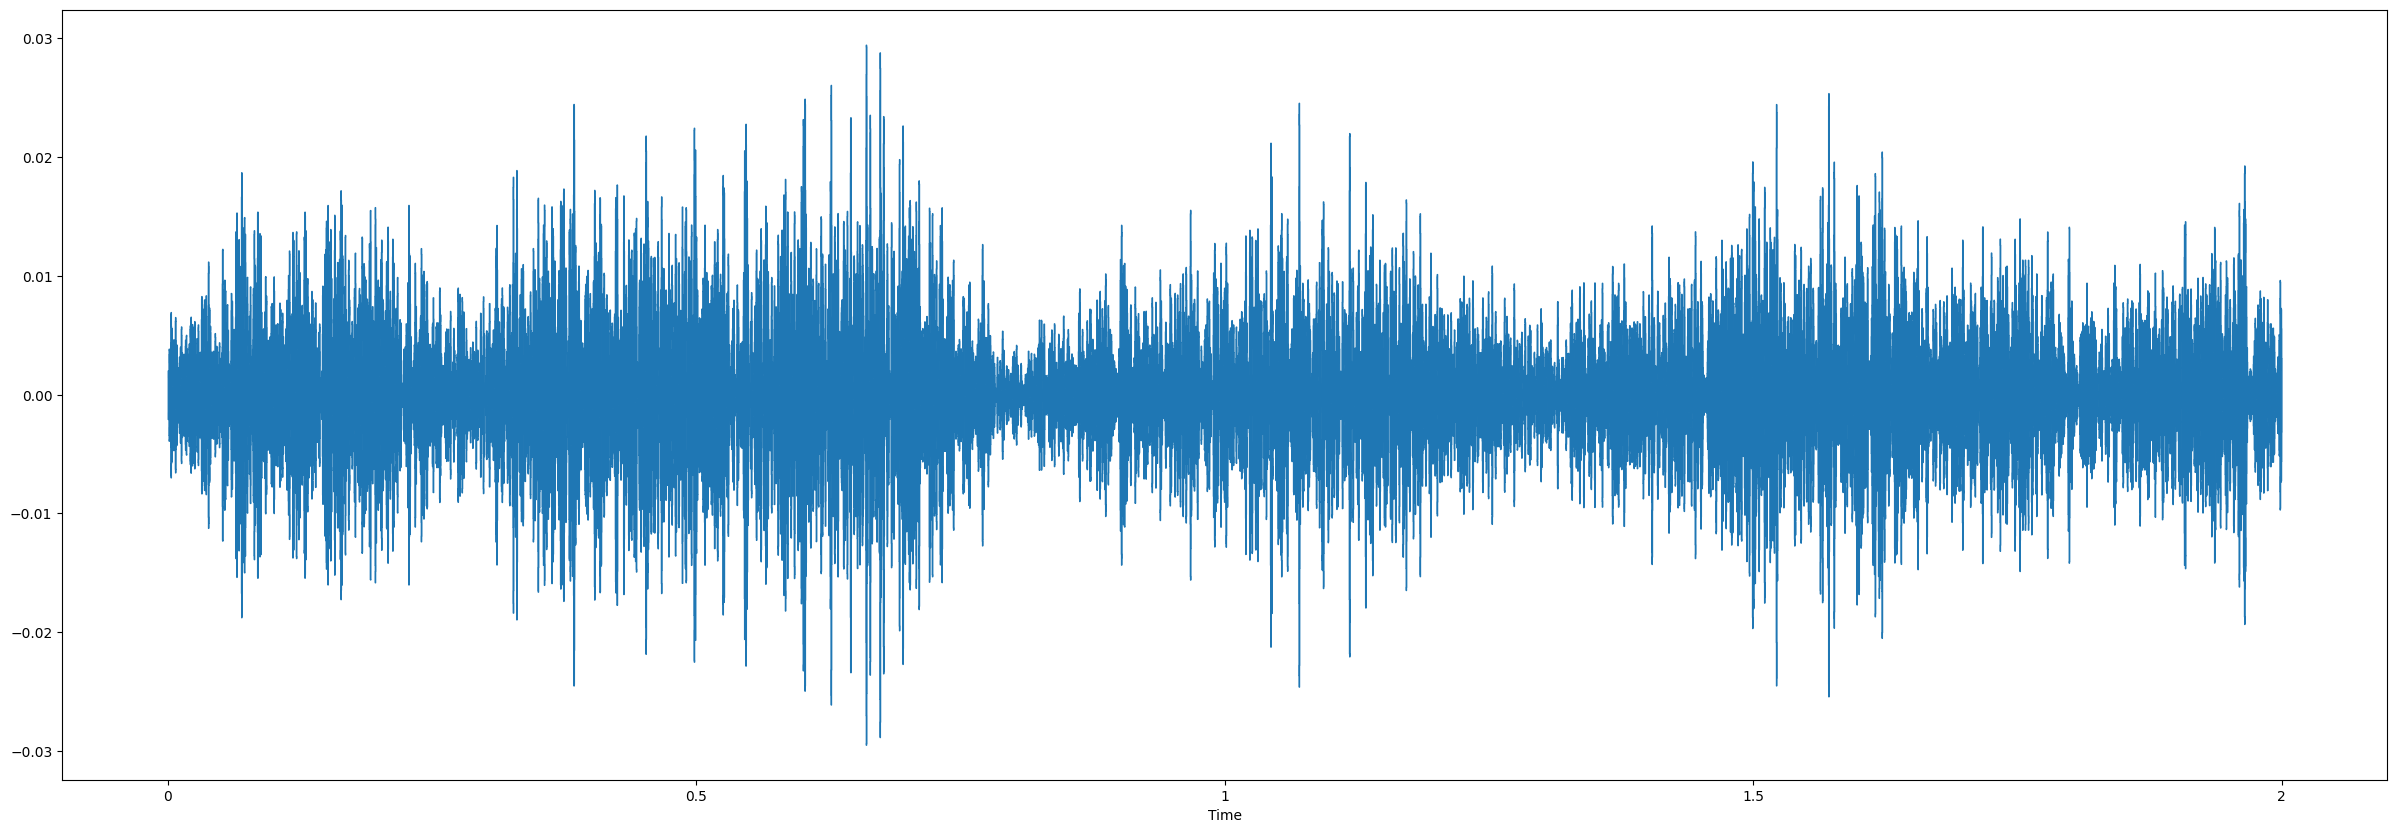

In [ ]:
y, sr = librosa.load(path + "/train_reduced/1.wav")
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=60)
feature_vector = np.array(mfccs.mean(axis = 1))
print("Shape of feature vector: ", feature_vector.shape)
print("Feacture Vector of the 441 sound :" , feature_vector)
plt.figure(figsize=(30,10))
librosa.display.waveshow(y, sr=sr)
Audio(data=y, rate=sr)

## Loading waveforms

In [ ]:
csv_path = path + "/train.csv"
labels = pd.read_csv(csv_path)
print(labels)
# print(labels["idx"][2])
# print(labels["class"][2])
print(labels.shape)

         idx       class
0          0     NoWhale
1          1  RightWhale
2          2     NoWhale
3          3     NoWhale
4          4     NoWhale
...      ...         ...
10929  10929  RightWhale
10930  10930     NoWhale
10931  10931     NoWhale
10932  10932  RightWhale
10933  10933     NoWhale

[10934 rows x 2 columns]
(10934, 2)


In [ ]:
def id_selector(v):
    return int(v.split('.')[0])

def encode(path, data_type = 'train', shuffle = True):
    data1 = []  # whale
    data2 = []  # no whale
    directory_1 = os.listdir(path +  data_type)
    directory_1.sort(key=id_selector)
    #print(directory_1)
    for f in directory_1:
      y, sr = librosa.load(path + data_type + f)
      mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=80)
      fv = mfccs.mean(axis = 1)
      id = f.split('.')[0]
      found_id = labels["idx"][int(id)]
      unknown_label = labels["class"][found_id]
      if unknown_label == "RightWhale":
        data1.append(fv)
      else:   # NoWhale
        data2.append(fv)
    data = np.array(data1)
    temp = np.array(data2)
    # Important: Here the label is added; in this case, it is 1, but it may vary according to your requirements.
    data = np.insert(data, 0, 1, axis=1)
    # Important: Here the label is added; in this case, it is -1, but it may vary according to your requirements.
    temp = np.insert(temp, 0, 0, axis=1)

    data = np.concatenate((data, temp), axis=0)
    if shuffle == True:
        np.random.shuffle(data)
    y = data[:,0]
    x = data[:, 1:]
    return x, y


In [ ]:
np.set_printoptions(suppress=True)
x_train, y_train = encode(path, "/train_reduced/")
x_test, y_test = encode(path, '/test_reduced/', False)
#x_train = pd.read_csv("datasets/x_train.csv").iloc[:,1:].to_numpy()
#y_train = pd.read_csv("datasets/y_train.csv").iloc[:,1].to_numpy()
#x_test = pd.read_csv("datasets/x_test.csv").iloc[:,1:].to_numpy()

In [ ]:
# Saves the extracted data into files
#temp = pd.DataFrame(x_train)
#temp.to_csv("datasets/x_train.csv")
#temp = pd.DataFrame(y_train.astype(int))
#temp.to_csv("datasets/y_train.csv")
#temp = pd.DataFrame(x_test)
#temp.to_csv("datasets/x_test.csv")

## Dimension reduction

In [ ]:
def graph_components(num_components, method, varianza_explicada):
    plt.figure(figsize=(10, 6))
    plt.bar(num_components, varianza_explicada, alpha=0.5, align='center', label='Varianza individual explicada')
    plt.step(num_components, np.cumsum(varianza_explicada), where='mid', label='Varianza acumulada')
    plt.ylabel('Porcentaje de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.title('Scree Plot de ' + method)
    plt.legend(loc='best')
    plt.axhline(y=95, color='r', linestyle='--')  # Línea opcional para el umbral de varianza deseado, ej. 95%
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import random


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)

data_scaled_test = scaler.fit_transform(x_test)
X_test_scaled = data_scaled_test

print("data scaled")
print(X_train_scaled)
print("max", np.max(X_train_scaled))
print("min", np.min(X_train_scaled))

data scaled
[[-1.2201431  -0.6042738  -0.61465573 ... -0.673201   -0.7950939
  -0.5596223 ]
 [ 0.02563893  1.0110273   0.9632534  ...  1.3601177   0.5038719
  -0.32197893]
 [ 0.6262036   0.69829565  0.6881915  ... -0.22319567 -0.1475698
  -0.03433207]
 ...
 [ 1.3395209   0.43181494  0.38719085 ... -0.37754643 -0.36788508
  -0.21177489]
 [ 1.719271    0.1887926   0.21280137 ... -0.53086764  0.46861038
   0.87661195]
 [ 0.5174141  -0.24210933 -0.21685933 ... -0.7344463  -0.5309941
  -0.22320382]]
max 14.122511
min -10.2407055


### PCA

(10934, 80)
(10934, 50)
(10934,)
[26.104752   14.914708   11.281331    7.1897006   5.11766     4.2823534
  3.9100957   3.3045285   2.5641532   2.2478673   1.9460222   1.8013897
  1.707273    1.6515248   1.5565952   1.4424717   1.3631207   1.2693598
  1.2049174   1.0959398   0.96520716  0.8419373   0.8130178   0.6543969
  0.57272327  0.1707357   0.02246679  0.00202612  0.00098972  0.000454
  0.00016486  0.00005346  0.00002679  0.00001038  0.0000074   0.00000721
  0.00000583  0.0000044   0.00000373  0.00000266  0.00000181  0.0000016
  0.0000015   0.0000012   0.00000095  0.0000009   0.00000086  0.00000069
  0.00000062  0.00000057]


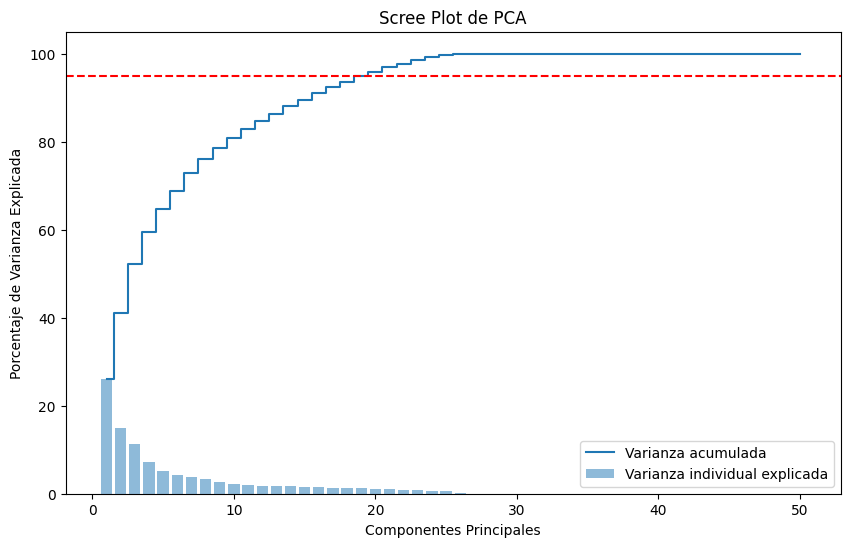

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import FactorAnalysis

pca = PCA(n_components=50)

pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
print(X_train_scaled.shape)
print(X_train_pca.shape)
print(y_train.shape)
varianza_explicada = pca.explained_variance_ratio_ * 100
print(varianza_explicada)
num_componentes = np.arange(len(varianza_explicada)) + 1

graph_components(num_componentes, "PCA", varianza_explicada)

In [ ]:
# Seleccionar el número de componentes principales
n_components_pca = 20
pca2 = PCA(n_components=n_components_pca)
pca2.fit(X_train_scaled)


eigen_vecs = pca2.components_
#print(eigen_vecs.shape)

# Transformar los datos al nuevo espacio
features_transformed_pca = pca2.transform(X_train_scaled)      # features_transformed es un numpy array
features_transformed_pca_test = pca2.transform(X_test_scaled)
print(features_transformed_pca.shape)
print(features_transformed_pca_test.shape)

(10934, 20)
(1962, 20)


### LDA

(10934, 1)


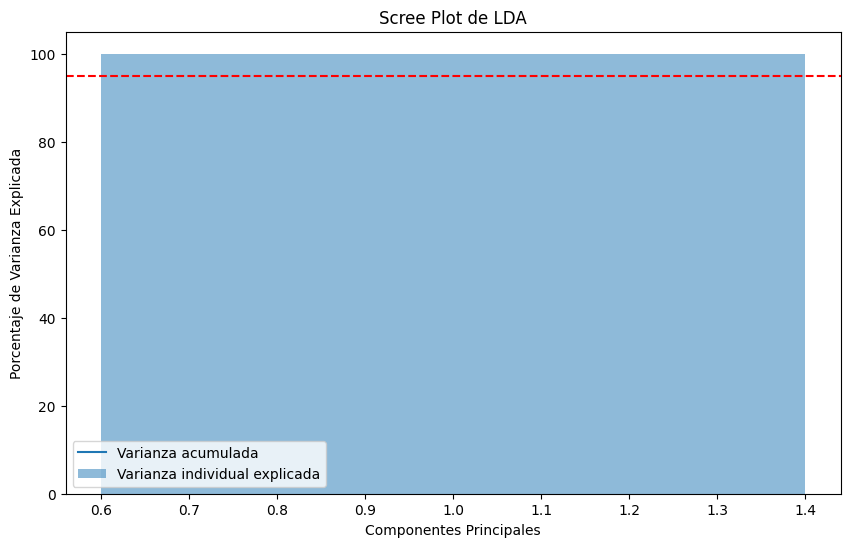

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
X_train_lda = pd.DataFrame(lda.transform(x_train))
print(X_train_lda.shape)
varianza_explicada = lda.explained_variance_ratio_ * 100
n_components_lda = np.arange(len(varianza_explicada)) + 1

graph_components(n_components_lda, "LDA", varianza_explicada)

In [ ]:
# Transformar los datos al nuevo espacio
features_transformed_lda = lda.transform(X_train_scaled)      # features_transformed es un numpy array
features_transformed_lda_test = lda.transform(X_test_scaled)
print(features_transformed_lda.shape)
print(features_transformed_lda_test.shape)

(10934, 1)
(1962, 1)


# Model

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

def matriz_confusion(y_pred, y_test, Tipo):
 sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["RightWhale", "NoWhale"], yticklabels=["RightWhale", "NoWhale"])
 plt.xlabel('Predicted')
 plt.ylabel('Actual')
 plt.show()

## MLP

### PCA

#### Dropout = 0

In [ ]:
import torch
from torch import nn

class MLP_PCA_1(torch.nn.Module):
    def __init__(self, n1, n2, n3, n_com):
        super(MLP_PCA_1, self).__init__()
        # Create the layers of the neural network here
        self.layer_1 = torch.nn.Sequential(
          torch.nn.Linear(n_com, n1),
          torch.nn.ReLU(),
          torch.nn.Linear(n1, n1)
        )
        self.layer_2 = torch.nn.Sequential(
          torch.nn.Linear(n1, n1),
          torch.nn.ReLU(),
          torch.nn.Linear(n1, n2)
        )
        self.layer_3 = torch.nn.Sequential(
          torch.nn.Linear(n2, n2),
          torch.nn.ReLU(),
          torch.nn.Linear(n2, n3)
        )
        self.layer_4 = torch.nn.Sequential(
          torch.nn.Linear(n3, n3),
          torch.nn.ReLU(),
          torch.nn.Linear(n3, 2)
        )

    def forward(self, x):
        # Compute the vector-matrix multiplications
        # Write your code here
        output = self.layer_1(x)
        output = self.layer_2(output)
        output = self.layer_3(output)
        output = self.layer_4(output)
        return output


def train(model, loss_f, optimizer, epochs, x_train, y_train):
  loss_lista = []
  i=0
  model.to(device)
  for epoch in range(epochs):
    x_train = x_train.to(device)
    y_train = y_train.to(device)

    # Propagacion adelante
    y_pred = model(x_train)
    loss = loss_f(y_pred,y_train)
    loss_lista.append(loss.cpu())
    i=i+1
    if (epoch%500==0):
      print('Epoch {}: train loss: {}'.format(epoch, loss.item()))    # Backward pass

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  return loss_lista

In [ ]:
# Remember the data must be transformed to torch tensors for PyTorch to handle and understand.
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train_split, y_test = train_test_split(features_transformed_pca, y_train, test_size=0.3, random_state=24)

x_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_train_split, dtype=torch.long).to(device)

cuda:0


In [ ]:
# For values in <0, 1>

model_pca = MLP_PCA_1(20, 10, 5, n_components_pca)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_pca.parameters(), lr = 0.01)

In [ ]:
epochs_mlp = 2000

loss_training = train(model_pca, loss, optimizer, epochs_mlp, x_tensor, y_tensor)

Epoch 0: train loss: 0.6933462023735046
Epoch 500: train loss: 0.28489744663238525
Epoch 1000: train loss: 0.22758853435516357
Epoch 1500: train loss: 0.20213091373443604


In [ ]:
torch.save(model_pca, 'model_pca_dropout0.pth')

In [ ]:
# Write your code here
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

def test(model, x_test, y_test):
  model = model.to(device)
  x_test = x_test.to(device)
  y_test = y_test.to(device)
  y_pred = model(x_test)

  y_test_np = y_test.cpu().numpy()
  y_pred_np = torch.argmax(y_pred, dim=1).cpu().numpy()

  ## Graficar la matriz de confusion y mostrar métricas como F1 score, presition and recall
  conf_matrix = confusion_matrix(y_test_np, y_pred_np)
  class_report = classification_report(y_test_np, y_pred_np, target_names = ["RightWhale", "NoWhale"])
  accuracy = accuracy_score(y_test_np, y_pred_np)
  f1Score = f1_score(y_test_np, y_pred_np)
  recallScore = recall_score(y_test_np, y_pred_np)
  precScore = precision_score(y_test_np, y_pred_np)

  print("\nAccuracy:", round(accuracy, 3))
  print("F1-Score:", round(f1Score, 3))
  print("Recall:", round(recallScore, 3))
  print("Precision:", round(precScore, 3))
  print("\nClassification Report:\n", class_report)
  #print("\nConfusion Matrix:\n", conf_matrix)
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["RightWhale", "NoWhale"], yticklabels=["RightWhale", "NoWhale"])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

def predict(model, x_test):
  model = model.to(device)
  x_test = x_test.to(device)
  y_pred = model(x_test)

  y_pred_np = torch.argmax(y_pred, dim=1).cpu().numpy()

  return y_pred_np

In [ ]:
model_pca = torch.load('model_pca_dropout0.pth')


Accuracy: 0.786
F1-Score: 0.794
Recall: 0.825
Precision: 0.765

Classification Report:
               precision    recall  f1-score   support

  RightWhale       0.81      0.75      0.78      1639
     NoWhale       0.77      0.82      0.79      1642

    accuracy                           0.79      3281
   macro avg       0.79      0.79      0.79      3281
weighted avg       0.79      0.79      0.79      3281



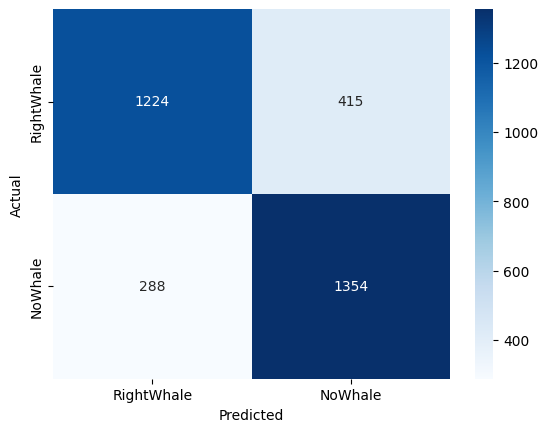

In [ ]:
x_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_test, dtype=torch.long).to(device)
test(model_pca, x_tensor, y_tensor)

#### Dropout = 0.2

In [ ]:
import torch
from torch import nn

class MLP_PCA_2(torch.nn.Module):
    def __init__(self, n1, n2, n3, n_com):
        super(MLP_PCA_2, self).__init__()
        # Create the layers of the neural network here
        self.layer_1 = torch.nn.Sequential(
          torch.nn.Linear(n_com, n1),
          torch.nn.ReLU(),
          torch.nn.Linear(n1, n1),
          nn.Dropout(p=0.2)
        )
        self.layer_2 = torch.nn.Sequential(
          torch.nn.Linear(n1, n1),
          torch.nn.ReLU(),
          torch.nn.Linear(n1, n2),
          nn.Dropout(p=0.2)
        )
        self.layer_3 = torch.nn.Sequential(
          torch.nn.Linear(n2, n2),
          torch.nn.ReLU(),
          torch.nn.Linear(n2, n3),
          nn.Dropout(p=0.2)
        )
        self.layer_4 = torch.nn.Sequential(
          torch.nn.Linear(n3, n3),
          torch.nn.ReLU(),
          torch.nn.Linear(n3, 2),
          nn.Dropout(p=0.2)
        )

    def forward(self, x):
        # Compute the vector-matrix multiplications
        # Write your code here
        output = self.layer_1(x)
        output = self.layer_2(output)
        output = self.layer_3(output)
        output = self.layer_4(output)
        return output


def train(model, loss_f, optimizer, epochs, x_train, y_train):
  loss_lista = []
  i=0
  model.to(device)
  for epoch in range(epochs):
    x_train = x_train.to(device)
    y_train = y_train.to(device)

    # Propagacion adelante
    y_pred = model(x_train)
    loss = loss_f(y_pred,y_train)
    loss_lista.append(loss.cpu())
    i=i+1
    if (epoch%500==0):
      print('Epoch {}: train loss: {}'.format(epoch, loss.item()))    # Backward pass

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  return loss_lista

In [ ]:
# Remember the data must be transformed to torch tensors for PyTorch to handle and understand.
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train_split, y_test = train_test_split(features_transformed_pca, y_train, test_size=0.3, random_state=24)

x_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_train_split, dtype=torch.long).to(device)

cuda:0


In [ ]:
# For values in <0, 1>

model_pca = MLP_PCA_2(20, 10, 5, n_components_pca)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_pca.parameters(), lr = 0.01)

In [ ]:
epochs_mlp = 2000

loss_training = train(model_pca, loss, optimizer, epochs_mlp, x_tensor, y_tensor)

Epoch 0: train loss: 0.7076215744018555
Epoch 500: train loss: 0.34694164991378784
Epoch 1000: train loss: 0.3325560986995697
Epoch 1500: train loss: 0.3135695159435272


In [ ]:
torch.save(model_pca, 'model_pca_dropout02.pth')

In [ ]:
# Write your code here
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def test(model, x_test, y_test):
  model = model.to(device)
  x_test = x_test.to(device)
  y_test = y_test.to(device)
  y_pred = model(x_test)

  y_test_np = y_test.cpu().numpy()
  y_pred_np = torch.argmax(y_pred, dim=1).cpu().numpy()

  ## Graficar la matriz de confusion y mostrar métricas como F1 score, presition and recall
  conf_matrix = confusion_matrix(y_test_np, y_pred_np)
  class_report = classification_report(y_test_np, y_pred_np, target_names = ["RightWhale", "NoWhale"])
  accuracy = accuracy_score(y_test_np, y_pred_np)

  print("\nAccuracy:", round(accuracy, 4))
  print("\nClassification Report:\n", class_report)
  #print("\nConfusion Matrix:\n", conf_matrix)
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["RightWhale", "NoWhale"], yticklabels=["RightWhale", "NoWhale"])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

def predict(model, x_test):
  model = model.to(device)
  x_test = x_test.to(device)
  y_pred = model(x_test)

  y_pred_np = torch.argmax(y_pred, dim=1).cpu().numpy()

  return y_pred_np

In [ ]:
model_pca = torch.load('model_pca_dropout02.pth')


Accuracy: 0.783
F1-Score: 0.786
Recall: 0.796
Precision: 0.776

Classification Report:
               precision    recall  f1-score   support

  RightWhale       0.79      0.77      0.78      1639
     NoWhale       0.78      0.80      0.79      1642

    accuracy                           0.78      3281
   macro avg       0.78      0.78      0.78      3281
weighted avg       0.78      0.78      0.78      3281



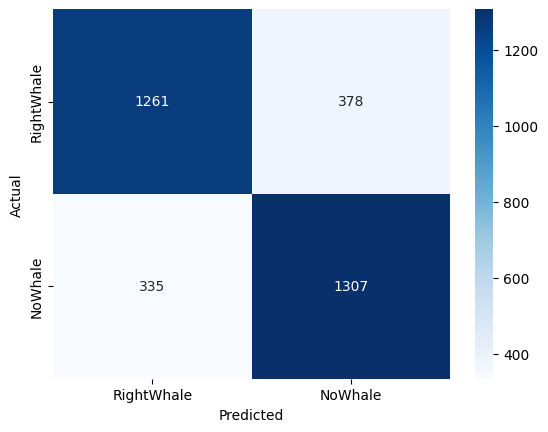

In [ ]:
x_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_test, dtype=torch.long).to(device)
test(model_pca, x_tensor, y_tensor)

#### Dropout = 0.4

In [ ]:
import torch
from torch import nn

class MLP_PCA_3(torch.nn.Module):
    def __init__(self, n1, n2, n3, n_com):
        super(MLP_PCA_3, self).__init__()
        # Create the layers of the neural network here
        self.layer_1 = torch.nn.Sequential(
          torch.nn.Linear(n_com, n1),
          torch.nn.ReLU(),
          torch.nn.Linear(n1, n1),
          nn.Dropout(p=0.4)
        )
        self.layer_2 = torch.nn.Sequential(
          torch.nn.Linear(n1, n1),
          torch.nn.ReLU(),
          torch.nn.Linear(n1, n2),
          nn.Dropout(p=0.4)
        )
        self.layer_3 = torch.nn.Sequential(
          torch.nn.Linear(n2, n2),
          torch.nn.ReLU(),
          torch.nn.Linear(n2, n3),
          nn.Dropout(p=0.4)
        )
        self.layer_4 = torch.nn.Sequential(
          torch.nn.Linear(n3, n3),
          torch.nn.ReLU(),
          torch.nn.Linear(n3, 2),
          nn.Dropout(p=0.4)
        )

    def forward(self, x):
        # Compute the vector-matrix multiplications
        # Write your code here
        output = self.layer_1(x)
        output = self.layer_2(output)
        output = self.layer_3(output)
        output = self.layer_4(output)
        return output


def train(model, loss_f, optimizer, epochs, x_train, y_train):
  loss_lista = []
  i=0
  model.to(device)
  for epoch in range(epochs):
    x_train = x_train.to(device)
    y_train = y_train.to(device)

    # Propagacion adelante
    y_pred = model(x_train)
    loss = loss_f(y_pred,y_train)
    loss_lista.append(loss.cpu())
    i=i+1
    if (epoch%500==0):
      print('Epoch {}: train loss: {}'.format(epoch, loss.item()))    # Backward pass

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  return loss_lista

In [ ]:
# Remember the data must be transformed to torch tensors for PyTorch to handle and understand.
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train_split, y_test = train_test_split(features_transformed_pca, y_train, test_size=0.3, random_state=24)

x_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_train_split, dtype=torch.long).to(device)

cuda:0


In [ ]:
# For values in <0, 1>

model_pca = MLP_PCA_3(20, 10, 5, n_components_pca)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_pca.parameters(), lr = 0.01)

In [ ]:
epochs_mlp = 2000

loss_training = train(model_pca, loss, optimizer, epochs_mlp, x_tensor, y_tensor)

Epoch 0: train loss: 0.7393826842308044
Epoch 500: train loss: 0.4224485754966736
Epoch 1000: train loss: 0.4087585210800171
Epoch 1500: train loss: 0.41122177243232727


In [ ]:
torch.save(model_pca, 'model_pca_dropout04.pth')

In [ ]:
# Write your code here
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def test(model, x_test, y_test):
  model = model.to(device)
  x_test = x_test.to(device)
  y_test = y_test.to(device)
  y_pred = model(x_test)

  y_test_np = y_test.cpu().numpy()
  y_pred_np = torch.argmax(y_pred, dim=1).cpu().numpy()

  ## Graficar la matriz de confusion y mostrar métricas como F1 score, presition and recall
  conf_matrix = confusion_matrix(y_test_np, y_pred_np)
  class_report = classification_report(y_test_np, y_pred_np, target_names = ["RightWhale", "NoWhale"])
  accuracy = accuracy_score(y_test_np, y_pred_np)

  print("\nAccuracy:", round(accuracy, 4))
  print("\nClassification Report:\n", class_report)
  #print("\nConfusion Matrix:\n", conf_matrix)
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["RightWhale", "NoWhale"], yticklabels=["RightWhale", "NoWhale"])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

def predict(model, x_test):
  model = model.to(device)
  x_test = x_test.to(device)
  y_pred = model(x_test)

  y_pred_np = torch.argmax(y_pred, dim=1).cpu().numpy()

  return y_pred_np

In [ ]:
model_pca = torch.load('model_pca_dropout04.pth')


Accuracy: 0.749
F1-Score: 0.744
Recall: 0.73
Precision: 0.758

Classification Report:
               precision    recall  f1-score   support

  RightWhale       0.74      0.77      0.75      1639
     NoWhale       0.76      0.73      0.74      1642

    accuracy                           0.75      3281
   macro avg       0.75      0.75      0.75      3281
weighted avg       0.75      0.75      0.75      3281



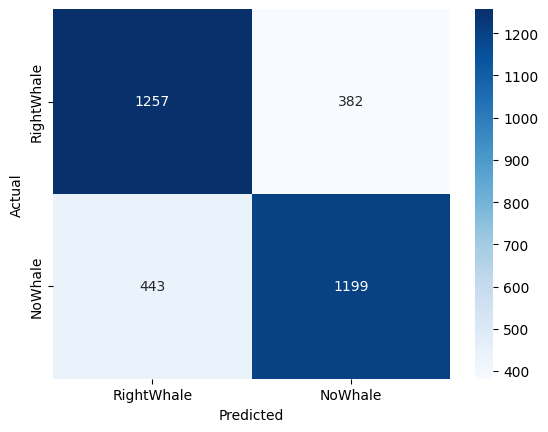

In [ ]:
x_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_test, dtype=torch.long).to(device)
test(model_pca, x_tensor, y_tensor)

### LDA

In [ ]:
# Remember the data must be transformed to torch tensors for PyTorch to handle and understand.
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train_split, y_test = train_test_split(features_transformed_lda, y_train, test_size=0.3, random_state=24)

x_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_train_split, dtype=torch.long).to(device)

cuda:0


In [ ]:
print(n_components_lda)

[1]


#### Dropout = 0

In [ ]:
import torch
from torch import nn

class MLP_LDA_1(torch.nn.Module):
    def __init__(self, n1, n2, n3, n_com):
        super(MLP_LDA_1, self).__init__()
        # Create the layers of the neural network here
        self.layer_1 = torch.nn.Sequential(
          torch.nn.Linear(n_com, n1),
          torch.nn.ReLU(),
          torch.nn.Linear(n1, n1)
        )
        self.layer_2 = torch.nn.Sequential(
          torch.nn.Linear(n1, n1),
          torch.nn.ReLU(),
          torch.nn.Linear(n1, n2)
        )
        self.layer_3 = torch.nn.Sequential(
          torch.nn.Linear(n2, n2),
          torch.nn.ReLU(),
          torch.nn.Linear(n2, n3)
        )
        self.layer_4 = torch.nn.Sequential(
          torch.nn.Linear(n3, n3),
          torch.nn.ReLU(),
          torch.nn.Linear(n3, 2)
        )

    def forward(self, x):
        # Compute the vector-matrix multiplications
        # Write your code here
        output = self.layer_1(x)
        output = self.layer_2(output)
        output = self.layer_3(output)
        output = self.layer_4(output)
        return output


def train(model, loss_f, optimizer, epochs, x_train, y_train):
  loss_lista = []
  i=0
  model.to(device)
  for epoch in range(epochs):
    x_train = x_train.to(device)
    y_train = y_train.to(device)

    # Propagacion adelante
    y_pred = model(x_train)
    loss = loss_f(y_pred,y_train)
    loss_lista.append(loss.cpu())
    i=i+1
    if (epoch%500==0):
      print('Epoch {}: train loss: {}'.format(epoch, loss.item()))    # Backward pass

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  return loss_lista

In [ ]:
# For values in <0, 1>

model_lda = MLP_LDA_1(20, 10, 5, n_components_lda[0])
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_lda.parameters(), lr = 0.01)

In [ ]:
epochs_mlp = 2000

loss_training = train(model_lda, loss, optimizer, epochs_mlp, x_tensor, y_tensor)

Epoch 0: train loss: 0.702120304107666
Epoch 500: train loss: 0.4287357032299042
Epoch 1000: train loss: 0.4269465506076813
Epoch 1500: train loss: 0.4249589741230011


In [ ]:
torch.save(model_lda, 'model_lda_dropout0.pth')

In [ ]:
model_lda = torch.load('model_lda_dropout0.pth')


Accuracy: 0.805
F1-Score: 0.81
Recall: 0.83
Precision: 0.791

Classification Report:
               precision    recall  f1-score   support

  RightWhale       0.82      0.78      0.80      1639
     NoWhale       0.79      0.83      0.81      1642

    accuracy                           0.80      3281
   macro avg       0.81      0.80      0.80      3281
weighted avg       0.81      0.80      0.80      3281



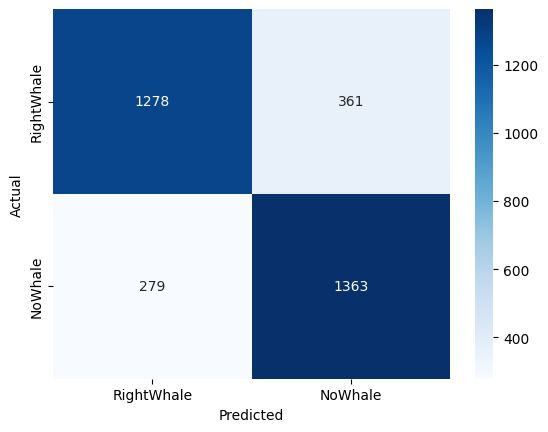

In [ ]:
x_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_test, dtype=torch.long).to(device)
test(model_lda, x_tensor, y_tensor)

#### Dropout = 0.2

In [ ]:
import torch
from torch import nn

class MLP_LDA_2(torch.nn.Module):
    def __init__(self, n1, n2, n3, n_com):
        super(MLP_LDA_2, self).__init__()
        # Create the layers of the neural network here
        self.layer_1 = torch.nn.Sequential(
          torch.nn.Linear(n_com, n1),
          torch.nn.ReLU(),
          torch.nn.Linear(n1, n1),
          nn.Dropout(p=0.2)
        )
        self.layer_2 = torch.nn.Sequential(
          torch.nn.Linear(n1, n1),
          torch.nn.ReLU(),
          torch.nn.Linear(n1, n2),
          nn.Dropout(p=0.2)
        )
        self.layer_3 = torch.nn.Sequential(
          torch.nn.Linear(n2, n2),
          torch.nn.ReLU(),
          torch.nn.Linear(n2, n3),
          nn.Dropout(p=0.2)
        )
        self.layer_4 = torch.nn.Sequential(
          torch.nn.Linear(n3, n3),
          torch.nn.ReLU(),
          torch.nn.Linear(n3, 2),
          nn.Dropout(p=0.2)
        )

    def forward(self, x):
        # Compute the vector-matrix multiplications
        # Write your code here
        output = self.layer_1(x)
        output = self.layer_2(output)
        output = self.layer_3(output)
        output = self.layer_4(output)
        return output


def train(model, loss_f, optimizer, epochs, x_train, y_train):
  loss_lista = []
  i=0
  model.to(device)
  for epoch in range(epochs):
    x_train = x_train.to(device)
    y_train = y_train.to(device)

    # Propagacion adelante
    y_pred = model(x_train)
    loss = loss_f(y_pred,y_train)
    loss_lista.append(loss.cpu())
    i=i+1
    if (epoch%500==0):
      print('Epoch {}: train loss: {}'.format(epoch, loss.item()))    # Backward pass

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  return loss_lista

In [ ]:
# For values in <0, 1>

model_lda = MLP_LDA_2(20, 10, 5, n_components_lda[0])
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_lda.parameters(), lr = 0.01)

In [ ]:
epochs_mlp = 2000

loss_training = train(model_lda, loss, optimizer, epochs_mlp, x_tensor, y_tensor)

Epoch 0: train loss: 0.7023757696151733
Epoch 500: train loss: 0.460346519947052
Epoch 1000: train loss: 0.45406684279441833
Epoch 1500: train loss: 0.4503805637359619


In [ ]:
torch.save(model_lda, 'model_lda_dropout02.pth')

In [ ]:
model_lda = torch.load('model_lda_dropout02.pth')


Accuracy: 0.791
F1-Score: 0.795
Recall: 0.812
Precision: 0.78

Classification Report:
               precision    recall  f1-score   support

  RightWhale       0.80      0.77      0.79      1639
     NoWhale       0.78      0.81      0.80      1642

    accuracy                           0.79      3281
   macro avg       0.79      0.79      0.79      3281
weighted avg       0.79      0.79      0.79      3281



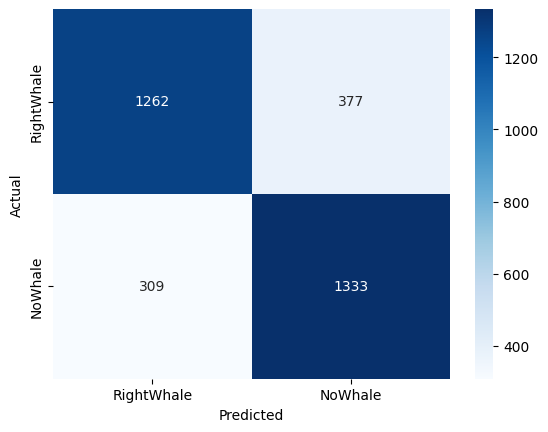

In [ ]:
x_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_test, dtype=torch.long).to(device)
test(model_lda, x_tensor, y_tensor)

#### Dropout = 0.4

In [ ]:
import torch
from torch import nn

class MLP_LDA_3(torch.nn.Module):
    def __init__(self, n1, n2, n3, n_com):
        super(MLP_LDA_3, self).__init__()
        # Create the layers of the neural network here
        self.layer_1 = torch.nn.Sequential(
          torch.nn.Linear(n_com, n1),
          torch.nn.ReLU(),
          torch.nn.Linear(n1, n1),
          nn.Dropout(p=0.4)
        )
        self.layer_2 = torch.nn.Sequential(
          torch.nn.Linear(n1, n1),
          torch.nn.ReLU(),
          torch.nn.Linear(n1, n2),
          nn.Dropout(p=0.4)
        )
        self.layer_3 = torch.nn.Sequential(
          torch.nn.Linear(n2, n2),
          torch.nn.ReLU(),
          torch.nn.Linear(n2, n3),
          nn.Dropout(p=0.4)
        )
        self.layer_4 = torch.nn.Sequential(
          torch.nn.Linear(n3, n3),
          torch.nn.ReLU(),
          torch.nn.Linear(n3, 2),
          nn.Dropout(p=0.4)
        )

    def forward(self, x):
        # Compute the vector-matrix multiplications
        # Write your code here
        output = self.layer_1(x)
        output = self.layer_2(output)
        output = self.layer_3(output)
        output = self.layer_4(output)
        return output


def train(model, loss_f, optimizer, epochs, x_train, y_train):
  loss_lista = []
  i=0
  model.to(device)
  for epoch in range(epochs):
    x_train = x_train.to(device)
    y_train = y_train.to(device)

    # Propagacion adelante
    y_pred = model(x_train)
    loss = loss_f(y_pred,y_train)
    loss_lista.append(loss.cpu())
    i=i+1
    if (epoch%500==0):
      print('Epoch {}: train loss: {}'.format(epoch, loss.item()))    # Backward pass

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  return loss_lista

In [ ]:
# For values in <0, 1>

model_lda = MLP_LDA_3(20, 10, 5, n_components_lda[0])
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_lda.parameters(), lr = 0.01)

In [ ]:
epochs_mlp = 2000

loss_training = train(model_lda, loss, optimizer, epochs_mlp, x_tensor, y_tensor)

Epoch 0: train loss: 0.7162227034568787
Epoch 500: train loss: 0.5003914833068848
Epoch 1000: train loss: 0.5051938891410828
Epoch 1500: train loss: 0.5023412108421326


In [ ]:
torch.save(model_lda, 'model_lda_dropout04.pth')

In [ ]:
model_lda = torch.load('model_lda_dropout04.pth')


Accuracy: 0.753
F1-Score: 0.737
Recall: 0.692
Precision: 0.788

Classification Report:
               precision    recall  f1-score   support

  RightWhale       0.72      0.81      0.77      1639
     NoWhale       0.79      0.69      0.74      1642

    accuracy                           0.75      3281
   macro avg       0.76      0.75      0.75      3281
weighted avg       0.76      0.75      0.75      3281



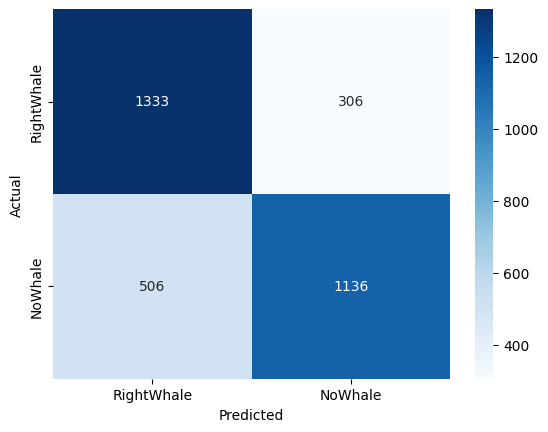

In [ ]:
x_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_test, dtype=torch.long).to(device)
test(model_lda, x_tensor, y_tensor)

# Test

Your model will have a predict function. It receives the x test data and returns a prediction, just as shown in the following code. This result will be used to create the confusion matrix as well as the metrics report



In [ ]:
model_pca = torch.load('model_pca_dropout0.pth')
model_lda = torch.load('model_lda_dropout0.pth')

In [ ]:
x_test_tensor_pca = torch.tensor(features_transformed_pca_test, dtype=torch.float32).to(device)
y_pred_mlp_pca = predict(model_pca, x_test_tensor_pca).astype(int).astype(str)

x_test_tensor_lda = torch.tensor(features_transformed_lda_test, dtype=torch.float32).to(device)
y_pred_mlp_lda = predict(model_lda, x_test_tensor_lda).astype(int).astype(str)

y_pred_mlp_pca[y_pred_mlp_pca == "0"] = "NoWhale"
y_pred_mlp_pca[y_pred_mlp_pca == "1"] = "RightWhale"

y_pred_mlp_lda[y_pred_mlp_lda == "0"] = "NoWhale"
y_pred_mlp_lda[y_pred_mlp_lda == "1"] = "RightWhale"

In [ ]:
df_y_pred = pd.DataFrame(y_pred_mlp_pca, columns=['class'])
df_y_pred.index.name = 'idx'
df_y_pred.to_csv("results/y_pred_mlp_pca_" + str(epochs_mlp) +".csv")

df_y_pred = pd.DataFrame(y_pred_mlp_lda, columns=['class'])
df_y_pred.index.name = 'idx'
df_y_pred.to_csv("results/y_pred_mlp_lda_" + str(epochs_mlp) +".csv")